In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Get data

In [2]:
songs = pd.read_csv('../data/songs.csv')
songs1 = pd.read_csv('../data/songs1.csv')
songs2 = pd.read_csv('../data/songs_hiphop.csv')
songs3 = pd.read_csv('../data/songs_dance.csv')
songs4 = pd.read_csv('../data/songs2.csv')
songs5 = pd.read_csv('../data/songs_rock.csv')
songs6 = pd.read_csv('../data/songs_sleep.csv')
songs7 = pd.read_csv('../data/songs_kpop.csv')
songs8 = pd.read_csv('../data/songs_party.csv')
songs9 = pd.read_csv('../data/songs_80.csv')
songs10 = pd.read_csv('../data/songs_classical.csv')
songs11 = pd.read_csv('../data/songs_classical2.csv')
songs12 = pd.read_csv('../data/songs_ch.csv')
songs13 = pd.read_csv('../data/songs_wild.csv')
songs14 = pd.read_csv('../data/songs_movie.csv')
songs15 = pd.read_csv('../data/songs_de.csv')
songs16 = pd.read_csv('../data/songs_50.csv')

In [3]:
df = pd.concat([songs,songs1,songs2,songs3,songs4,songs5,songs6,songs7,songs8,songs9,songs10,songs11,songs12,songs13,songs14,songs15,songs16],axis=0)

In [4]:
df.head()

,song,artist,album_name,album_id,danceability,energy,key,loudness,mode,speechiness,...,track_href,time_signature,song.1,artist.1,album_name.1,album_id.1,duration_ms,duration_ms.1,explicit,popularity
0,Sure Thing,Miguel,All I Want Is You,493HYe7N5pleudEZRyhE7R,0.684,0.607,11.0,-8.127,0.0,0.1000,...,https://api.spotify.com/v1/tracks/0JXXNGljqups...,4.0,Sure Thing,Miguel,All I Want Is You,493HYe7N5pleudEZRyhE7R,195373.0,195373,False,91
1,Adorn,Miguel,Kaleidoscope Dream,21XMv0TCsnhWPt7MNVvkzD,0.625,0.576,11.0,-5.693,0.0,0.1750,...,https://api.spotify.com/v1/tracks/25cUhiAod71T...,4.0,Adorn,Miguel,Kaleidoscope Dream,21XMv0TCsnhWPt7MNVvkzD,193147.0,193146,False,69
2,Girl With The Tattoo Enter.lewd,Miguel,All I Want Is You,493HYe7N5pleudEZRyhE7R,0.372,0.239,6.0,-11.314,0.0,0.0296,...,https://api.spotify.com/v1/tracks/1eUGmzzvahJj...,4.0,Girl With The Tattoo Enter.lewd,Miguel,All I Want Is You,493HYe7N5pleudEZRyhE7R,102813.0,102813,False,81
3,coffee,Miguel,Wildheart (Deluxe Version),6W8ZsoinSMViZMh9aYK7gQ,0.556,0.618,10.0,-7.471,0.0,0.0463,...,https://api.spotify.com/v1/tracks/6vMpPxLV0F5D...,4.0,coffee,Miguel,Wildheart (Deluxe Version),6W8ZsoinSMViZMh9aYK7gQ,286573.0,286573,True,60
4,Power Trip (feat. Miguel),J. Cole,Born Sinner (Deluxe Version),5FP9keIJnlSCKnkdVOf623,0.667,0.608,1.0,-7.054,1.0,0.2160,...,https://api.spotify.com/v1/tracks/2uwnP6tZVVmT...,4.0,Power Trip (feat. Miguel),J. Cole,Born Sinner (Deluxe Version),5FP9keIJnlSCKnkdVOf623,241160.0,241160,True,77


In [5]:
df.columns

Index(['song', 'artist', 'album_name', 'album_id', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'id', 'id.1', 'uri',
       'uri.1', 'track_href', 'time_signature', 'song.1', 'artist.1',
       'album_name.1', 'album_id.1', 'duration_ms', 'duration_ms.1',
       'explicit', 'popularity'],
      dtype='object')

In [6]:
df = df[['song', 'artist', 'album_name', 'album_id', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'id', 'uri',
         'track_href', 'time_signature', 'duration_ms', 'explicit', 'popularity']]

In [7]:
df.shape

(10059, 22)

In [8]:
df.isna().sum()

song                0
artist              0
album_name          0
album_id            0
danceability        2
energy              2
key                 2
loudness            2
mode                2
speechiness         2
acousticness        2
instrumentalness    2
liveness            2
valence             2
tempo               2
id                  2
uri                 2
track_href          2
time_signature      2
duration_ms         2
explicit            0
popularity          0
dtype: int64

In [9]:
df = df[df['danceability'].isna()==False]
df.isna().sum()

song                0
artist              0
album_name          0
album_id            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
id                  0
uri                 0
track_href          0
time_signature      0
duration_ms         0
explicit            0
popularity          0
dtype: int64

# K-means

In [10]:
# K-means
import numpy as np
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D



In [11]:
Xn = df.select_dtypes(np.number)
Xn

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,popularity
0,0.684,0.607,11.0,-8.127,0.0,0.1000,0.02670,0.000307,0.1910,0.498,81.001,4.0,195373.0,91
1,0.625,0.576,11.0,-5.693,0.0,0.1750,0.05430,0.000041,0.1870,0.235,179.063,4.0,193147.0,69
2,0.372,0.239,6.0,-11.314,0.0,0.0296,0.85600,0.000175,0.1680,0.127,113.451,4.0,102813.0,81
3,0.556,0.618,10.0,-7.471,0.0,0.0463,0.00558,0.000351,0.1530,0.121,80.985,4.0,286573.0,60
4,0.667,0.608,1.0,-7.054,1.0,0.2160,0.32400,0.000198,0.4260,0.475,99.992,4.0,241160.0,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,0.696,0.587,6.0,-6.717,0.0,0.0275,0.04330,0.000003,0.1290,0.691,93.016,4.0,218548.0,0
754,0.379,0.662,7.0,-4.791,1.0,0.0388,0.72200,0.000000,0.2420,0.207,80.440,4.0,290000.0,0
755,0.845,0.700,6.0,-7.150,0.0,0.1650,0.10600,0.000000,0.2890,0.745,103.043,4.0,423577.0,16
756,0.671,0.694,9.0,-9.650,0.0,0.0399,0.84400,0.914000,0.0558,0.400,126.015,4.0,230388.0,0


In [12]:
# K-Means is a distance based algorithm: we need to scale / normalize:

from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(Xn)

# Now, all features will have the same weight.
pd.DataFrame(X_prep,columns=Xn.columns).head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,popularity
0,0.586255,0.035084,1.629304,0.179332,-1.217368,-0.037232,-0.853221,-0.575704,-0.054815,0.174270,-1.438927,0.220976,-0.255768,4.343139
1,0.232883,-0.080161,1.629304,0.581703,-1.217368,0.463517,-0.774012,-0.576494,-0.078086,-0.841464,2.021112,0.220976,-0.278245,3.073501
2,-1.282425,-1.332988,0.185230,-0.347520,-1.217368,-0.507269,1.526779,-0.576095,-0.188625,-1.258572,-0.293955,0.220976,-1.190362,3.766031
3,-0.180383,0.075978,1.340489,0.287777,-1.217368,-0.395768,-0.913833,-0.575573,-0.275892,-1.281744,-1.439492,0.220976,0.665094,2.554104
4,0.484436,0.038802,-1.258844,0.356712,0.821444,0.737260,-0.000003,-0.576027,1.312373,0.085441,-0.768845,0.220976,0.206551,3.535188


In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=1)
kmeans.fit(X_prep)

KMeans(random_state=1)

In [14]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    1230
1    1957
2     905
3    2085
4    1668
5    1355
6     254
7     603
dtype: int64

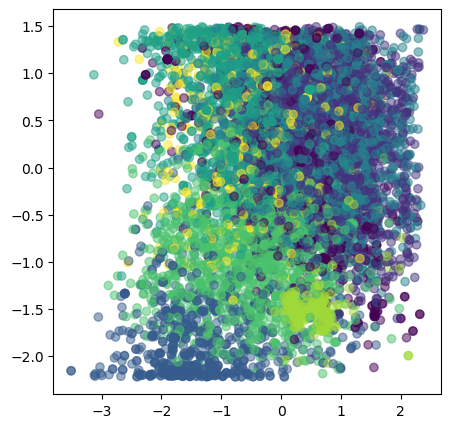

In [15]:
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 1], c=clusters,alpha=0.5)
plt.show()

In [16]:
kmeans.inertia_ 

84200.75692308463

In [17]:
%%time
kmeans = KMeans(n_clusters=3,
                init="random",
                n_init=100,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                random_state=1234)
kmeans.fit(X_prep)
print(kmeans.inertia_)

110501.81073345055
Wall time: 1.24 s


# Choosing k

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

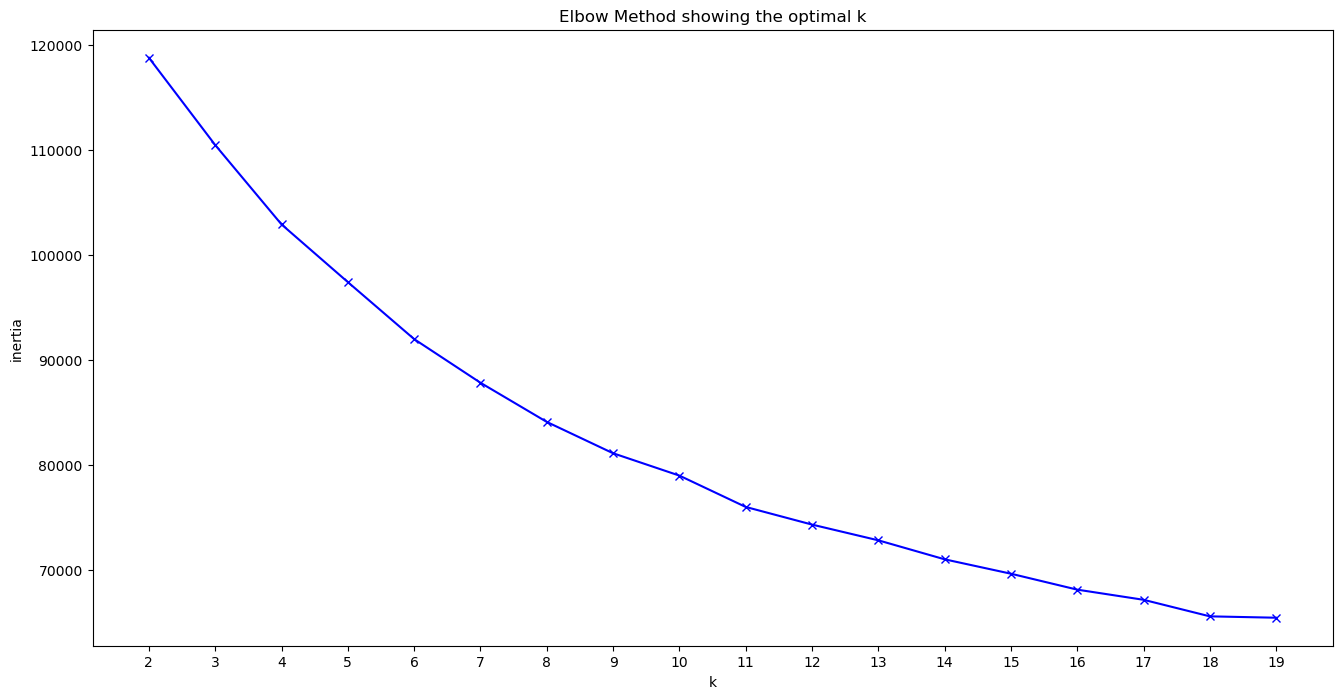

In [18]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')    

### Not obvious

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

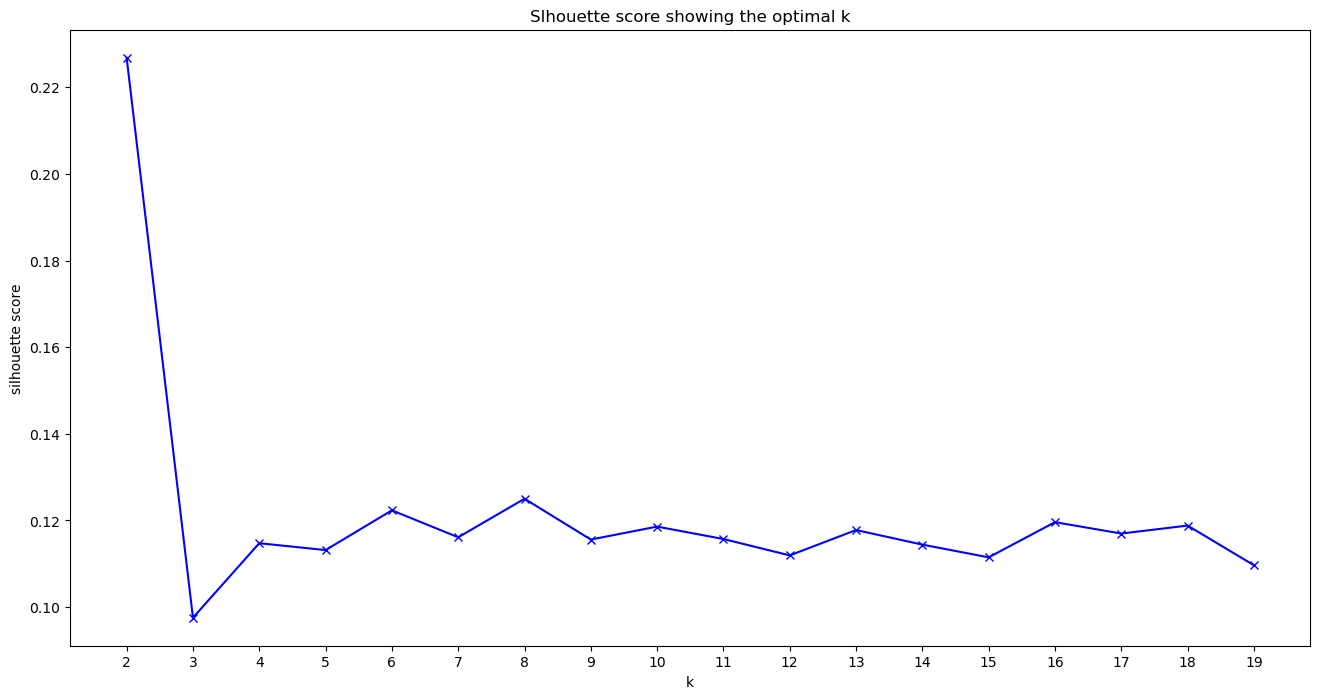

In [19]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

### wenn k=8, the silhouette score is max

# Agglomerative clustering

In [20]:
from sklearn import cluster

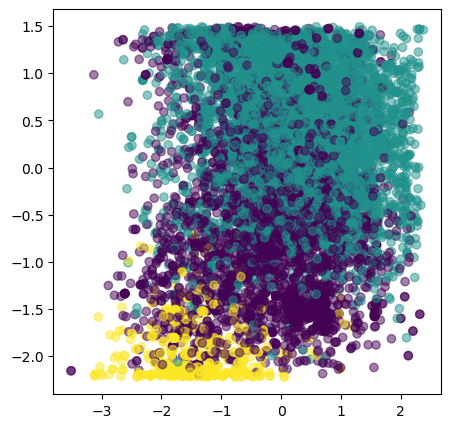

In [21]:
# ward linkage tends to produce relatively equally sized clusters
agglomerative = cluster.AgglomerativeClustering(n_clusters=3,linkage='ward')
pred = agglomerative.fit_predict(X_prep)

plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 1], c=pred,alpha=0.5)

plt.show()

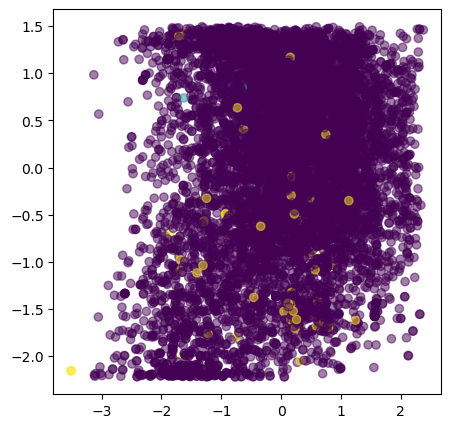

In [22]:
# complete linkage penalizes heavily outliers
agglomerative = cluster.AgglomerativeClustering(n_clusters=3,linkage='complete')
pred = agglomerative.fit_predict(X_prep)

plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 1], c=pred,alpha=0.5)
plt.show()

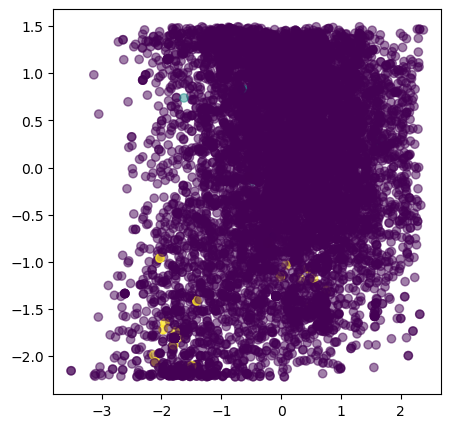

In [23]:
# different algorithms are good for different applications
agglomerative = cluster.AgglomerativeClustering(n_clusters=3,linkage='average')
pred = agglomerative.fit_predict(X_prep)

plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 1], c=pred,alpha=0.5)
plt.show()

# Preprocessing

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
Xn.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,10057.0,0.586117,0.166971,0.000000,0.4780,0.598000,0.702,0.983
energy,10057.0,0.597563,0.269005,0.000559,0.4040,0.637000,0.829,0.999
key,10057.0,5.358656,3.462599,0.000000,2.0000,6.000000,8.000,11.000
loudness,10057.0,-9.211801,6.049438,-47.001000,-11.3710,-7.508000,-5.366,3.968
mode,10057.0,0.597097,0.490506,0.000000,0.0000,1.000000,1.000,1.000
speechiness,10057.0,0.105576,0.149783,0.000000,0.0357,0.049800,0.102,0.958
acousticness,10057.0,0.324001,0.348463,0.000001,0.0139,0.167000,0.613,0.996
instrumentalness,10057.0,0.194385,0.337131,0.000000,0.0000,0.000074,0.246,0.998
liveness,10057.0,0.200422,0.171894,0.011300,0.0981,0.130000,0.249,0.996
valence,10057.0,0.452877,0.258939,0.000000,0.2420,0.428000,0.654,0.981


In [26]:
X_train, X_test = train_test_split(
    Xn,
    test_size=0.2,
    random_state=59
)

In [27]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,2012.0,0.582233,0.165842,0.063500,0.47000,0.593500,0.70000,0.973
energy,2012.0,0.593215,0.270014,0.000559,0.40100,0.634500,0.82325,0.998
key,2012.0,5.371769,3.451296,0.000000,2.00000,6.000000,8.00000,11.000
loudness,2012.0,-9.305058,6.074686,-39.245000,-11.55475,-7.535000,-5.38900,2.419
mode,2012.0,0.617296,0.486168,0.000000,0.00000,1.000000,1.00000,1.000
speechiness,2012.0,0.107349,0.149770,0.022200,0.03580,0.049250,0.10600,0.950
acousticness,2012.0,0.326911,0.352036,0.000001,0.01215,0.167500,0.63500,0.996
instrumentalness,2012.0,0.207161,0.342050,0.000000,0.00000,0.000111,0.31800,0.998
liveness,2012.0,0.201448,0.168443,0.015300,0.09840,0.132500,0.25800,0.996
valence,2012.0,0.453941,0.261520,0.031100,0.23400,0.427000,0.67400,0.980


In [28]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,8045.0,0.587089,0.167248,0.000000,0.4800,0.599000,0.703,0.983
energy,8045.0,0.598650,0.268758,0.000570,0.4050,0.637000,0.831,0.999
key,8045.0,5.355376,3.465626,0.000000,2.0000,6.000000,8.000,11.000
loudness,8045.0,-9.188478,6.043261,-47.001000,-11.3400,-7.506000,-5.362,3.968
mode,8045.0,0.592045,0.491485,0.000000,0.0000,1.000000,1.000,1.000
speechiness,8045.0,0.105133,0.149792,0.000000,0.0357,0.050100,0.100,0.958
acousticness,8045.0,0.323273,0.347582,0.000001,0.0143,0.167000,0.609,0.996
instrumentalness,8045.0,0.191190,0.335835,0.000000,0.0000,0.000072,0.220,0.996
liveness,8045.0,0.200165,0.172756,0.011300,0.0980,0.130000,0.246,0.996
valence,8045.0,0.452611,0.258305,0.000000,0.2440,0.428000,0.649,0.981


In [29]:
scaler = StandardScaler()
#scaler.fit(X_train)
#X_train_scaled = scaler.transform(X_train)
#same thing in 1 line
X_train_scaled = scaler.fit_transform(X_train)

In [30]:
X_test_scaled = scaler.transform(X_test)

In [31]:
pd.DataFrame(X_train_scaled).describe().T

,count,mean,std,min,25%,50%,75%,max
0,8045.0,6.813140e-16,1.000062,-3.510499,-0.640338,0.071223,0.693092,2.367353
1,8045.0,2.810110e-16,1.000062,-2.225488,-0.720582,0.142703,0.864587,1.489724
2,8045.0,6.179712e-17,1.000062,-1.545380,-0.968248,0.186017,0.763149,1.628847
3,8045.0,4.542323e-17,1.000062,-6.257362,-0.356042,0.278423,0.633220,2.177185
4,8045.0,6.038399e-16,1.000062,-1.204678,-1.204678,0.830097,0.830097,0.830097
5,8045.0,3.367930e-17,1.000062,-0.701904,-0.463559,-0.367420,-0.034271,5.694016
6,8045.0,-7.948893e-17,1.000062,-0.930119,-0.888978,-0.449629,0.822094,1.935571
7,8045.0,7.688070e-17,1.000062,-0.569332,-0.569332,-0.569118,0.085792,2.396591
8,8045.0,-1.566870e-16,1.000062,-1.093319,-0.591423,-0.406179,0.265331,4.606989
9,8045.0,-1.439357e-17,1.000062,-1.752343,-0.807664,-0.095284,0.760346,2.045728


In [32]:
pd.DataFrame(X_test_scaled).describe().T

,count,mean,std,min,25%,50%,75%,max
0,2012.0,-0.029036,0.991654,-3.130801,-0.700133,0.038336,0.675153,2.307558
1,2012.0,-0.020224,1.004737,-2.225529,-0.735466,0.133400,0.835749,1.486003
2,2012.0,0.004731,0.995927,-1.545380,-0.968248,0.186017,0.763149,1.628847
3,2012.0,-0.019292,1.005262,-4.973869,-0.391580,0.273624,0.628752,1.920850
4,2012.0,0.051381,0.989242,-1.204678,-1.204678,0.830097,0.830097,0.830097
5,2012.0,0.014790,0.999915,-0.553690,-0.462892,-0.373095,0.005787,5.640606
6,2012.0,0.010467,1.012878,-0.930118,-0.895164,-0.448191,0.896901,1.935571
7,2012.0,0.047558,1.018568,-0.569332,-0.569332,-0.569003,0.377619,2.402547
8,2012.0,0.007422,0.975098,-1.070163,-0.589108,-0.391707,0.334797,4.606989
9,2012.0,0.005151,1.012510,-1.631935,-0.846381,-0.099156,0.857137,2.041856


# With PCA

In [33]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_scaled)

PCA()

#### Explained Variance Ratio

In [34]:
pca.explained_variance_ratio_.round(2)

array([0.23, 0.11, 0.09, 0.08, 0.07, 0.07, 0.07, 0.07, 0.06, 0.05, 0.05,
       0.03, 0.02, 0.01])

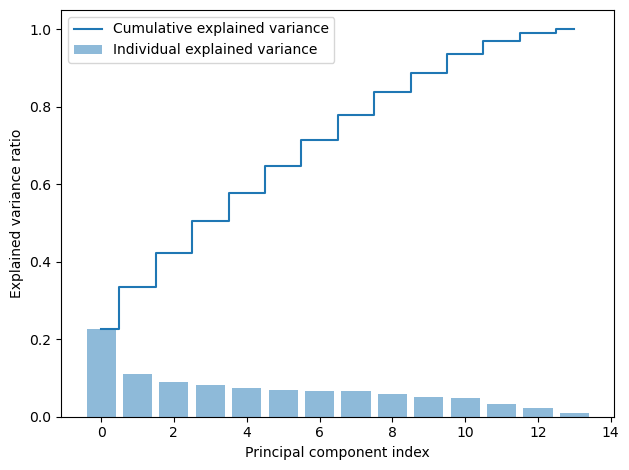

In [35]:
import numpy as np
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.

cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#cum_sum_eigenvalues

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, 
         where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [36]:
pca.explained_variance_ratio_[:11].sum()

0.9367628978499029

In [37]:
pca = PCA(0.90)
pca.fit(X_train_scaled)

PCA(n_components=0.9)

In [38]:
pca.explained_variance_ratio_

array([0.22564106, 0.10972531, 0.08849574, 0.08067418, 0.07289103,
       0.06893781, 0.06765737, 0.06570889, 0.05799365, 0.05058472,
       0.04845315])

In [39]:
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#### PCA: correlation between original variables and variables after applying PCA

In [40]:
import seaborn as sb

Text(0.5, 1.0, 'Correlation of PC scores')

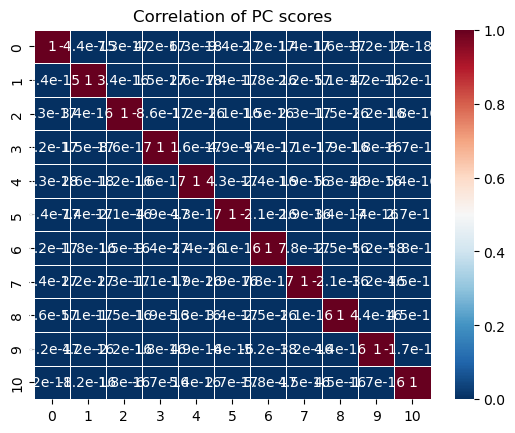

In [41]:
X_train_pca = pca.transform(X_train_scaled)
corr_pc = pd.DataFrame(X_train_pca).corr()
sb.heatmap(corr_pc, 
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.title('Correlation of PC scores')

Text(0.5, 1.0, 'Correlation of in original data')

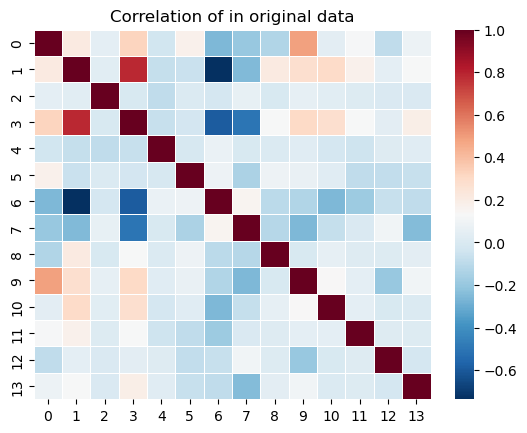

In [42]:
corr = pd.DataFrame(X_train_scaled).corr()
sb.heatmap(corr, 
            cmap='RdBu_r',
            annot=False,
            linewidth=0.5)
plt.title('Correlation of in original data')

In [43]:
Xn.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'duration_ms', 'popularity'],
      dtype='object')

#### How the features mixed up to create the components

In [44]:
pca.components_[0:6]

array([[-2.76113911e-01, -4.83730094e-01, -2.01651923e-02,
        -4.96530896e-01,  5.10543589e-02, -1.14694737e-02,
         4.21141106e-01,  2.91338611e-01, -1.04229992e-01,
        -2.80274393e-01, -2.19375194e-01, -1.33698119e-01,
         1.95887501e-02, -1.48454085e-01],
       [-4.23783394e-01,  2.41098825e-01, -1.83089322e-03,
         7.70083358e-02, -7.59768834e-02, -3.79024357e-01,
        -2.84664868e-01,  2.69821217e-01,  1.75234498e-01,
        -4.47726305e-01,  1.35707436e-01,  1.61185351e-01,
         4.09523949e-01, -9.90089145e-02],
       [-3.32961489e-01,  5.63932655e-04, -3.62996234e-01,
         9.79355075e-02,  2.93163005e-01,  1.60695122e-01,
         1.12560509e-01, -4.03069055e-01,  4.71838299e-01,
        -1.70716850e-01, -4.14447141e-02, -3.33264326e-01,
         1.33271383e-02,  3.10065618e-01],
       [-9.15508773e-02,  5.52277433e-02,  2.68689689e-01,
        -3.23406528e-02, -3.44316330e-01,  5.55184626e-01,
        -1.26022608e-02,  6.18732301e-02,  4.

C:\Users\jiaxing\AppData\Local\Temp\ipykernel_11348\3177282602.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


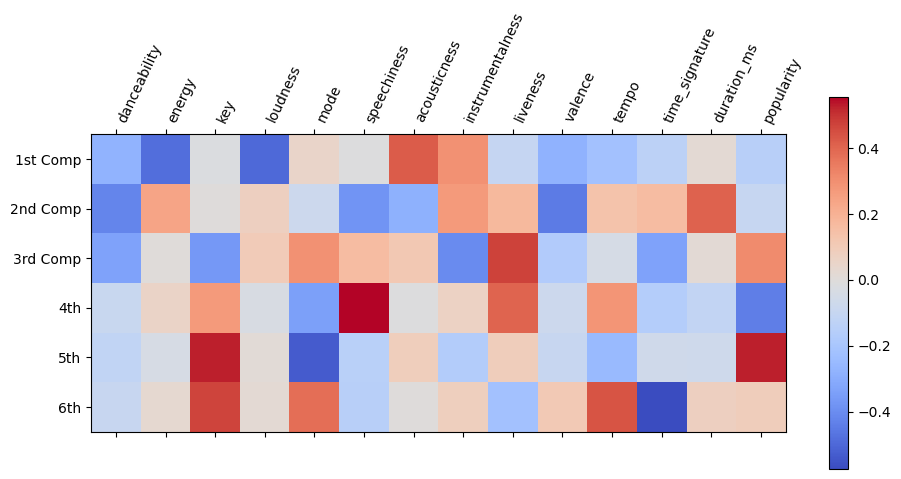

In [45]:
plt.matshow(pca.components_[0:6], cmap='coolwarm')
plt.yticks([0,1,2,3,4,5],['1st Comp','2nd Comp','3rd Comp','4th','5th','6th'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(Xn.columns)),Xn.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

# get songlist from PopVortex Hot 100

In [46]:
import requests
from bs4 import BeautifulSoup

In [47]:
url = "https://www.popvortex.com/music/charts/top-100-songs.php"

In [48]:
response = requests.get(url)
response.status_code 
soup = BeautifulSoup(response.content, "html.parser")

In [49]:
title = []
singer = []

num_iter = len(soup.select("div.chart-content.col-xs-12.col-sm-8"))

for i in range(num_iter):
    title.append(soup.select("p.title-artist cite.title")[i].get_text())
    singer.append(soup.select("p > em")[i].get_text())

df1 = pd.DataFrame({"song":title,"artist":singer})
df1

,song,artist
0,FLOWER,JISOO
1,Last Night,Morgan Wallen
2,Flowers,Miley Cyrus
3,Fast Car,Luke Combs
4,Thank God I Do,Lauren Daigle
...,...,...
95,golden hour,JVKE
96,TQG,KAROL G & Shakira
97,STUNTMAN (feat. Vince Staples),"Tyler, The Creator"
98,10:35,Tiësto & Tate McRae


# recommender from PopVortex Hot 100

In [50]:
#song = input("Please enter a song title: ")

In [51]:
# if song in df1['song'].values:
#     recommendation = df1[df1['song'] != song].sample()
#     recommended_song = recommendation.iloc[0]['song']
#     recommended_artist = recommendation.iloc[0]['artist']
#     print(f"Here's a recommendation for you: {recommended_song} by {recommended_artist}")
# else:
#     print("Sorry, we don't have a recommendation at this time.")

# recommender from Spotify

In [52]:
song = input("Please enter a song title: ")
if song in df['song'].values:
    pick=pd.DataFrame(df[df['song']==song].iloc[0]).T
    pick=pick[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo','time_signature', 'duration_ms', 'popularity']]
    pick=pick.apply(pd.to_numeric, errors='coerce')
    new_song_prep = scaler.transform(pick)
    new_song_cluster = kmeans.predict(new_song_prep)[0]
    similar_songs = df[clusters == new_song_cluster]
    if len(similar_songs)>0:
        recommendations = similar_songs.sample(3)
        print("Here's a recommendation for you: ")
        print(recommendations['song'])
    else:
        print("Sorry, we don't have a recommendation at this time.")   
else:
    print("Sorry, we don't have a recommendation at this time.")

Please enter a song title: Alb Lebnen
Here's a recommendation for you: 
234    Repeat After Me - Extended Mix
442                         Ciara Day
430       Shadow World - Extended Mix
Name: song, dtype: object
